# EXPLORATION_03

## 1. 사진 준비하기

### 이미지 처리를 위해 opencv와 노트북에 이미지를 출력하기 위한 matplotlib 읽어오기

In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 준비한 이미지 읽기

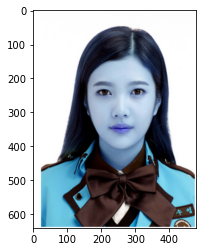

In [61]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/증명사진.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr,(480,640))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_wcopy = img_bgr.copy() # 스티커를 자연스럽게 붙이는 용도로 별도 보관
plt.imshow(img_bgr)
plt.show()

### 색깔 보정처리

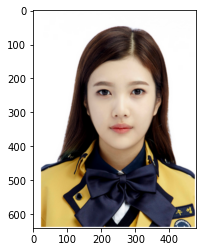

In [62]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. 얼굴 검출 (face detection)

###  dlib을 활용해 hog detector 선언

In [63]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

### detector를 이용해서 얼굴의 bounding box를 추출

In [64]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

### 찾은 얼굴을 화면에 출력하기

rectangles[[(142, 192) (365, 415)]]


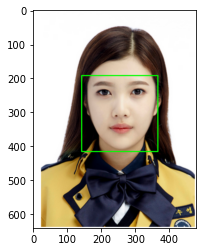

In [65]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. 얼굴 랜드마크 (face landmark)

### landmark 모델 불러오기

In [66]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [67]:
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 
# dlib.full_object_detection 를 반환합니다.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


### 랜드마크를 영상에 출력하기

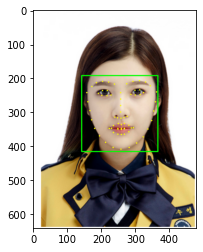

In [68]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 4. 스티커 적용하기

### 좌표 확인하기

In [69]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[2]) # 왼
    print (landmark[30])  #오
    print (landmark[36]) # 위
    print (landmark[48])  # 아래
    
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2
    h = landmark[48][1]-y
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(166, 295)
(256, 299)
(191, 244)
(223, 347)
(x,y) : (166,244)
(w,h) : (180,103)


#### => (x,y)를 스티커의 시작점 top-left로 지정하였다.
<br>
<div>
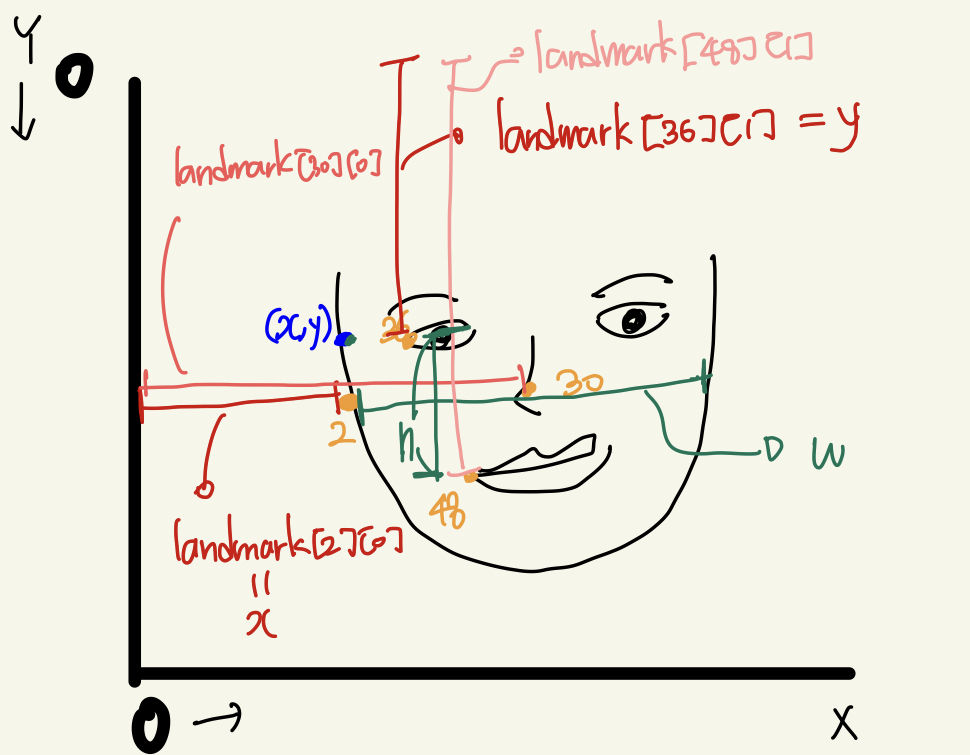
</div>



### 준비해 둔 스티커 이미지를 읽어서 적용해보기

(103, 180, 3)


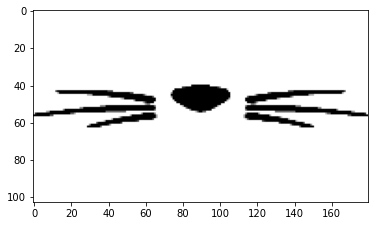

In [70]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

### x, y 좌표 조정하기 => 처음부터 top-left 좌표로 시작점을 잡았기 때문에 생략!

In [71]:
#refined_x = x-w//4  # left
#refined_y = y + h//20   # top
#print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

### 원본 이미지의 범위를 벗어난 스티커 부분 제거 => 벗어난 부분이 없으므로 생략!

In [72]:
#img_sticker = img_sticker[-refined_y:]
#print (img_sticker.shape)

### top의 y를 원본 이미지의 경계 값으로 수정 => 이것도 역시 생략!

In [73]:
#refined_y = 0
#print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

### 원본 이미지에 스티커를 적용

In [74]:
sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#### => img_show[좌측 상단 y 좌표 : 우측 하단 y 좌표, 좌측 상단 x 좌표 : 우측 하단 x 좌표]
<br>
<div>
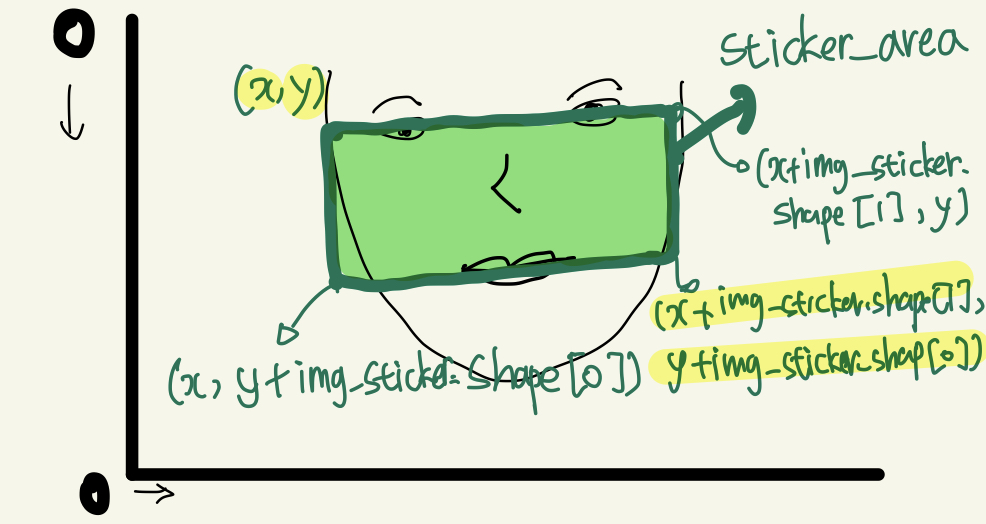
</div>



### 결과 이미지 출력

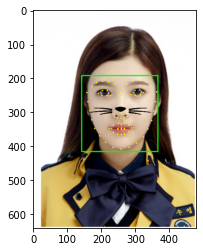

(640, 480, 3)

In [75]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()
img_show.shape

### bounding box와 landmark를 제거하고 최종 결과 출력

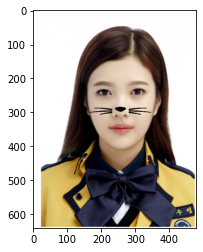

In [76]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 스티커를 자연스럽게 하기

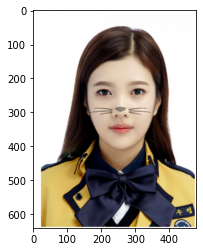

In [78]:
sticker_area = img_wcopy[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_wcopy[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.6,np.where(img_sticker==255,sticker_area,img_w).astype(np.uint8), 0.4, 0)

img_w_rgb=cv2.cvtColor(img_wcopy, cv2.COLOR_BGR2RGB)
plt.imshow(img_w_rgb)
plt.show()

**************************************

# 이미지 변형하기

# 1. 회전

In [114]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## (1) 180도 회전

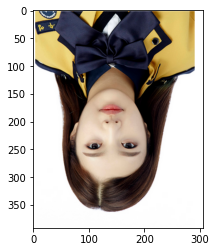

In [115]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/증명사진.png'
image = cv2.imread(my_image_path)
image = cv2.resize(image,dsize=(306 ,392))    # 640x360의 크기로 Resize
img180 = cv2.rotate(image, cv2.ROTATE_180)
img_show180 = img180.copy()

img_rgb180 = cv2.cvtColor(img180, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb180)
plt.show()


#### 얼굴 검출

rectangles[[(15, 118) (201, 304)]]


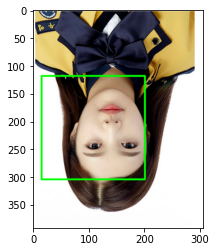

In [116]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb180 = cv2.cvtColor(img180, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb180, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show180, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb180 =  cv2.cvtColor(img_show180, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb180)
plt.show()

#### 얼굴 랜드마크

68


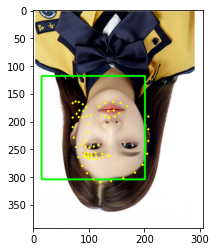

In [117]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 
# dlib.full_object_detection 를 반환합니다.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb180, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show180, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb180 = cv2.cvtColor(img_show180, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb180)
plt.show()

#### 스티커적용

(73, 229)
(93, 235)
(78, 186)
(91, 262)
(x,y) : (73,186)
(w,h) : (40,76)
(76, 40, 3)


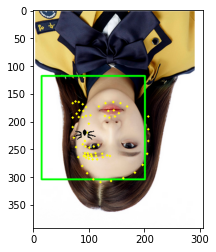

In [118]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[2]) # 왼
    print (landmark[30])  #오
    print (landmark[36]) # 위
    print (landmark[48])  # 아래
    
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2
    h = landmark[48][1]-y
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    

import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

sticker_area = img_show180[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show180[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show180, cv2.COLOR_BGR2RGB))
plt.show()

### 180도 회전시켰을 때, 찍힌 랜드마크를 보니 얼굴인식이 제대로 되지 않는걸 알 수 있다. 사진은 눈코입이 뒤집어져 있지만 , 랜드마크는 뒤집어진 눈코입을 제대로 인식하지 못한다.

***

## (2) 90도 회전

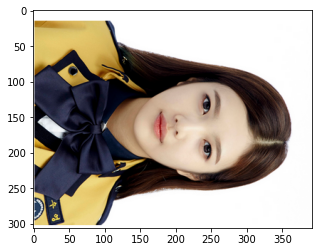

In [119]:
img90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
img_show90 = img90.copy()

img_rgb90 = cv2.cvtColor(img90, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb90)
plt.show()


#### 얼굴검출

rectangles[]


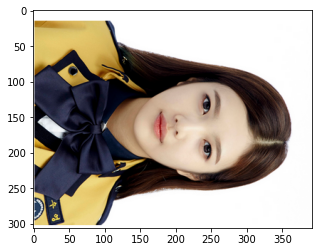

In [120]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb90 = cv2.cvtColor(img90, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb90, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show90, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb90 =  cv2.cvtColor(img_show90, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb90)
plt.show()

### 초록색 상자가 나타나지 않은 것을 보아 90도 회전시켰을 때, 얼굴인식이 안 되는 것을 알 수 있다.

***

## (3) 얼굴이 약간 기울어진 사진

#### 사진 준비하기

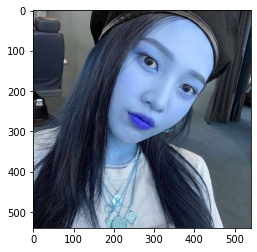

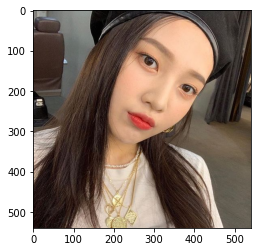

In [121]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/조이23.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (540, 540))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


#### 얼굴 검출

rectangles[[(171, 82) (438, 350)]]


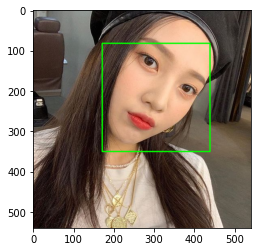

In [122]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 얼굴 랜드마크

68


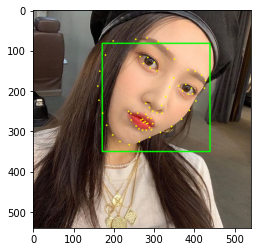

In [123]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 
# dlib.full_object_detection 를 반환합니다.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 스티커 적용하기

(165, 151)
(318, 236)
(265, 115)
(236, 251)
(x,y) : (165,115)
(w,h) : (306,136)
(136, 306, 3)


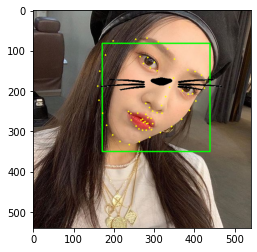

In [124]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[2]) # 왼
    print (landmark[30])  #오
    print (landmark[36]) # 위
    print (landmark[48])  # 아래
    
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2
    h = landmark[48][1]-y
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    

import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 최종결과 출력

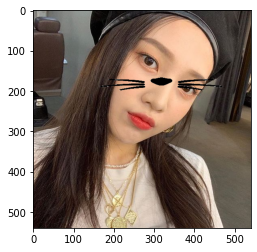

In [125]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 얼굴 영역 인식과 랜드마크는 잘 나타난다. 대신, 스티커가 제대로 붙여지지 않았다. 얼굴 각도가 변함에 따라 스티커도 맞춰서 회전시켜줘야 될 것 같다.

***

# 2. 밝기에 따라

## (1) 밝은 사진

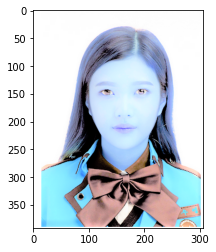

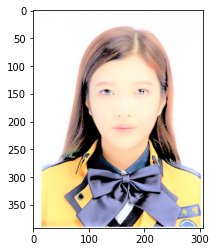

In [153]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/bright.png'
img_bright = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bright = cv2.resize(img_bright,(306 ,392))    # 640x360의 크기로 Resize
img_show_br = img_bright.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bright)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb_br = cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_br)
plt.show()

#### 얼굴 검출

rectangles[[(96, 110) (225, 239)]]


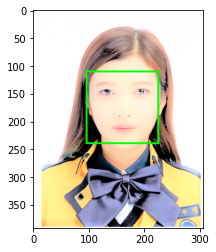

In [154]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb_br = cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb_br, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show_br, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb_br =  cv2.cvtColor(img_show_br, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_br)
plt.show()

#### 얼굴 랜드마크

68


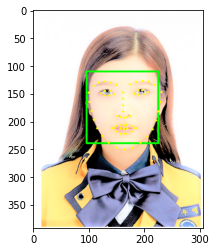

In [155]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 
# dlib.full_object_detection 를 반환합니다.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb_br, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show_br, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb_br = cv2.cvtColor(img_show_br, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_br)
plt.show()

#### 스티커 적용

(105, 181)
(162, 182)
(122, 149)
(142, 212)
(x,y) : (105,149)
(w,h) : (114,63)
(63, 114, 3)


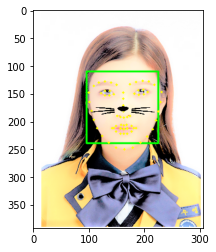

In [156]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[2]) # 왼
    print (landmark[30])  #오
    print (landmark[36]) # 위
    print (landmark[48])  # 아래
    
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2
    h = landmark[48][1]-y
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    

import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

sticker_area = img_show_br[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show_br[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show_br, cv2.COLOR_BGR2RGB))
plt.show()

### 사진이 밝아져도 이목구비가 구분이 되면 얼굴인식이 잘 되기 때문에 스티커를 원하는 위치에 적용할 수 있다.

### => 이목구비가 구분이 안 될 정도로 밝은 사진이라면 ❓  

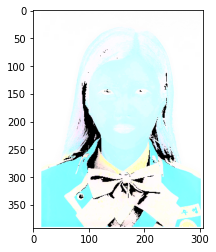

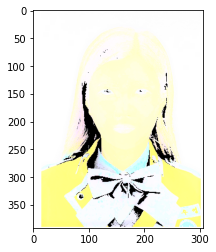

rectangles[[(96, 110) (225, 239)]]


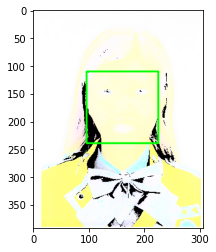

68


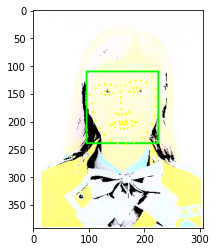

(107, 183)
(158, 178)
(123, 150)
(140, 206)
(x,y) : (107,150)
(w,h) : (102,56)
(56, 102, 3)


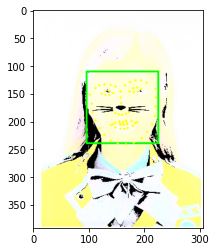

In [157]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/toomuchbright.png'
img_bright = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bright = cv2.resize(img_bright,(306 ,392))    # 640x360의 크기로 Resize
img_show_br = img_bright.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bright)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb_br = cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_br)
plt.show()

# 얼굴 검출
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb_br = cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb_br, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show_br, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb_br =  cv2.cvtColor(img_show_br, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_br)
plt.show()
 
# 얼굴 랜드마크
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 
# dlib.full_object_detection 를 반환합니다.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb_br, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show_br, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb_br = cv2.cvtColor(img_show_br, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_br)
plt.show()

# 스티커 적용
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[2]) # 왼
    print (landmark[30])  #오
    print (landmark[36]) # 위
    print (landmark[48])  # 아래
    
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2
    h = landmark[48][1]-y
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    

import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

sticker_area = img_show_br[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show_br[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show_br, cv2.COLOR_BGR2RGB))
plt.show()

### 이목구비 형태가 대충 보이긴 보이므로 얼굴 인식이 된다. 하지만 랜드마크가 찍힌 것을 확대해서 보면, 눈과 입 위치에 랜드마크를 정확히 찍지 못하였다. 아마 이목구비 형태가 보이지 않을 정도의 밝기 사진이라면 얼굴 인식에 어려움이 있을 것으로 예상된다.
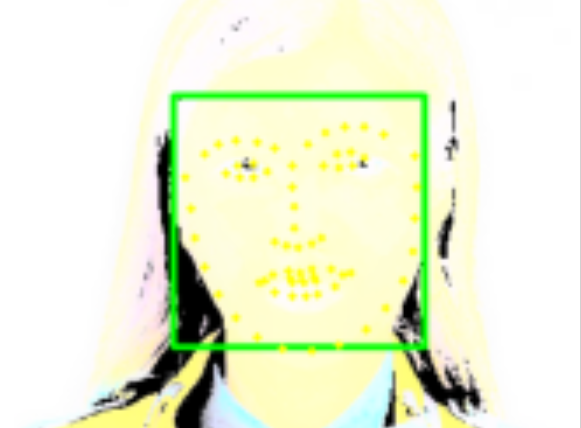

***

## (2) 어두운 사진 

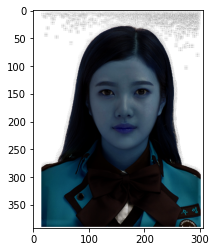

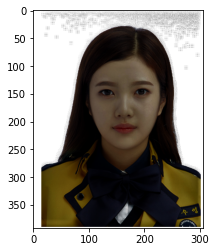

In [159]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/dark.png'
img_dark = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bright = cv2.resize(img_dark,(306 ,392))    # 640x360의 크기로 Resize
img_show_da = img_dark.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_dark)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb_da = cv2.cvtColor(img_dark, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_da)
plt.show()

#### 얼굴 검출

rectangles[[(96, 110) (225, 239)]]


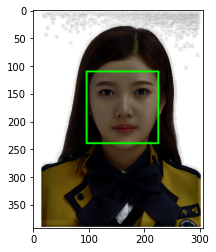

In [160]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb_da = cv2.cvtColor(img_dark, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb_da, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show_da, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb_da =  cv2.cvtColor(img_show_da, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_da)
plt.show()

#### 얼굴 랜드마크

68


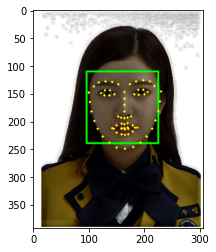

In [161]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 
# dlib.full_object_detection 를 반환합니다.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb_da, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show_da, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb_da = cv2.cvtColor(img_show_da, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_da)
plt.show()

#### 스티커 적용

(105, 182)
(164, 182)
(122, 149)
(142, 212)
(x,y) : (105,149)
(w,h) : (118,63)
(63, 118, 3)


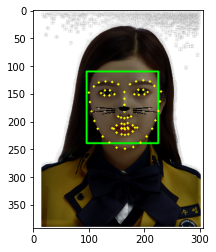

In [162]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[2]) # 왼
    print (landmark[30])  #오
    print (landmark[36]) # 위
    print (landmark[48])  # 아래
    
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2
    h = landmark[48][1]-y
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    

import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

sticker_area = img_show_da[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show_da[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show_da, cv2.COLOR_BGR2RGB))
plt.show()

###  밝은 사진과 마찬가지로 이목구비 형태가 보이면 얼굴이 인식이 잘된다! 아마 이목구비가 구분되지 않을 정도의 어두운 사진을 가져오면 얼굴인식이 잘 안 될 것이다. 

***

# 3. 촬영거리에 따라

## 멀리 있는 사진1

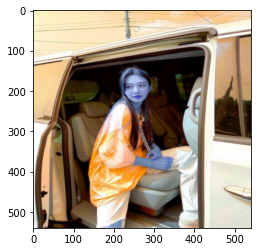

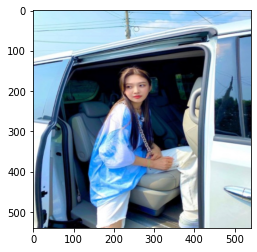

In [163]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/조이17.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (540, 540))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


#### 얼굴 검출

rectangles[[(225, 170) (287, 232)]]


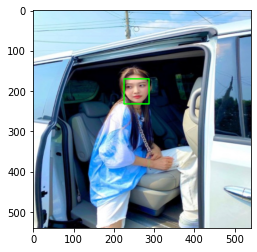

In [164]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 얼굴 랜드마크

68


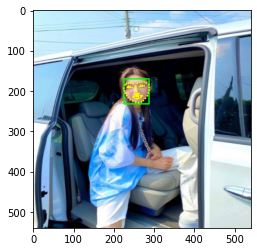

In [165]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 
# dlib.full_object_detection 를 반환합니다.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 스티커 적용하기

(228, 206)
(256, 203)
(233, 191)
(247, 215)
(x,y) : (228,191)
(w,h) : (56,24)
(24, 56, 3)


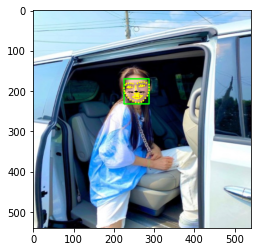

In [166]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[2]) # 왼
    print (landmark[30])  #오
    print (landmark[36]) # 위
    print (landmark[48])  # 아래
    
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2
    h = landmark[48][1]-y
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    

import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 최종결과 출력

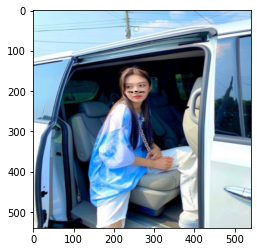

In [167]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 촬영거리가 멀어져도 인식이 잘 된다. 더 멀어지면 어떻게 될까?

## 멀리 있는 사진2

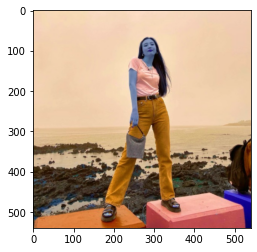

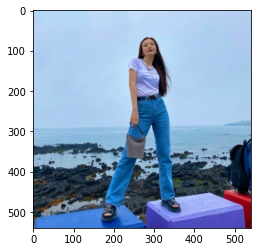

In [168]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/조이18.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (540, 540))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

#### 얼굴 검출 & 랜드마크

rectangles[[(269, 74) (305, 110)]]
68


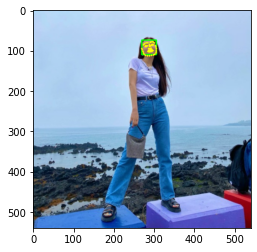

In [169]:
# 얼굴 검출
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# 랜드마크
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 
# dlib.full_object_detection 를 반환합니다.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 스티커 적용 & 최종 결과 출력

(272, 102)
(289, 90)
(277, 90)
(284, 102)
(x,y) : (272,90)
(w,h) : (34,12)
(12, 34, 3)


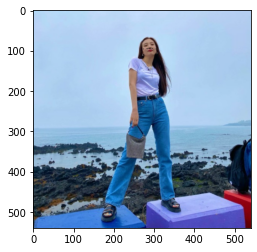

In [170]:
# 스티커 적용
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[2]) # 왼
    print (landmark[30])  #오
    print (landmark[36]) # 위
    print (landmark[48])  # 아래
    
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2
    h = landmark[48][1]-y
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    

import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)

sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)


# 최종 결과 출력
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 더 멀리 떨어진 촬영거리에서도 얼굴 인식이 잘 되어 스티커를 원하는 위치에 적용할 수 있었다.